# **CONTEXTO**

**A companhia Milsa possui dados de 36 funcionários da seção de orçamentos. Para cada funcionário temos os seguintes atributos: estado civil, instrução de educação, filhos,salário, idade (anos e meses), região. A imagem a seguir mostra o exemplo de dados de 5 destes funcionários.**

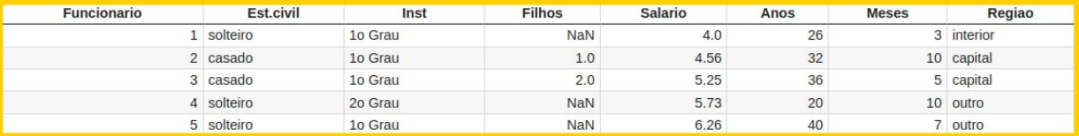

# **O QUE É PARA FAZER?**

■ Primeiramente, coloque a coluna Funcionário como índice;

■ Saiba que a coluna meses não é necessária para a análise e deve ser retirada;

■ Qual a média de idade dos funcionários?

■ Dos funcionários, com filhos, qual o número mais comum?

■ Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?

■ Quais são os tipos de instrução existentes?

■ Qual a média de salário e idade das pessoas casadas?

■ Qual o funcionário que possui maior salário (informe seus atributos)?

■ Qual o funcionário que possui menor idade (informe seus atributos)?

■ Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

■ Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc).

■ Forneça pelo menos mais 3 informações que você achar interessante.

In [249]:
# Carregando arquivo CSV
import pandas as pd
dados = pd.read_csv('milsa.csv')

### **Primeiramente, coloque a coluna Funcionário como índice;**

In [250]:
# Primeiramente, coloque a coluna Funcionário como índice;
# Comando set_index para transformar o índice em Funcionario
dados = dados.set_index('Funcionario')
print(dados)



            Est.civil      Inst  Filhos  Salario  Anos  Meses    Regiao
Funcionario                                                            
1            solteiro   1o Grau     NaN     4.00    26      3  interior
2              casado   1o Grau     1.0     4.56    32     10   capital
3              casado   1o Grau     2.0     5.25    36      5   capital
4            solteiro   2o Grau     NaN     5.73    20     10     outro
5            solteiro   1o Grau     NaN     6.26    40      7     outro
6              casado   1o Grau     0.0     6.66    28      0  interior
7            solteiro   1o Grau     NaN     6.86    41      0  interior
8            solteiro   1o Grau     NaN     7.39    43      4   capital
9              casado   2o Grau     1.0     7.59    34     10   capital
10           solteiro   2o Grau     NaN     7.44    23      6     outro
11             casado   2o Grau     2.0     8.12    33      6  interior
12           solteiro   1o Grau     NaN     8.46    27     11   

### **Saiba que a coluna meses não é necessária para a análise e deve ser retirada;**

In [251]:
# Saiba que a coluna meses não é necessária para a análise e deve ser retirada;
dados = dados.drop('Meses', axis=1)# Comando para excluir a tabela Meses
print(dados)

            Est.civil      Inst  Filhos  Salario  Anos    Regiao
Funcionario                                                     
1            solteiro   1o Grau     NaN     4.00    26  interior
2              casado   1o Grau     1.0     4.56    32   capital
3              casado   1o Grau     2.0     5.25    36   capital
4            solteiro   2o Grau     NaN     5.73    20     outro
5            solteiro   1o Grau     NaN     6.26    40     outro
6              casado   1o Grau     0.0     6.66    28  interior
7            solteiro   1o Grau     NaN     6.86    41  interior
8            solteiro   1o Grau     NaN     7.39    43   capital
9              casado   2o Grau     1.0     7.59    34   capital
10           solteiro   2o Grau     NaN     7.44    23     outro
11             casado   2o Grau     2.0     8.12    33  interior
12           solteiro   1o Grau     NaN     8.46    27   capital
13           solteiro   2o Grau     NaN     8.74    37     outro
14             casado   1

### **Qual a média de idade dos funcionários?**

In [261]:
# Qual a média de idade dos funcionários?
idade = dados['Anos'] 
idade_media = idade.mean()
print(f'A média de idade dos funcionários é de {idade_media:.1f} anos.')

A média de idade dos funcionários é de 34.6 anos.


### **Dos funcionários, com filhos, qual o número mais comum?**

In [220]:
# Dos funcionários, com filhos, qual o número mais comum?
# realizando filtro para nao exibir os funcionaris que nao possui registro na coluna Filhos e assim calcular e exibir o numero que mais aparece no banco
filhos_comum = dados[dados['Filhos'] != 'NA']['Filhos'].value_counts().idxmax()
print(f'O número mais comum de filhos entre os funcionários é {filhos_comum} filhos')

O número mais comum de filhos entre os funcionários é 2.0 filhos


### **Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?**

In [221]:

# Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?
media_salarios = dados['Salario'].mean()
mediana_salarios = dados['Salario'].median()
print('A média leva em consideração todos os valores altos e baixos e indica o valor que representa o centro dos dados.')
print('A média dos valores de salário dos funcionários é de:',round(media_salarios,2))
print('A mediana indica em ordem qual é o valor que está exatamente no meio do conjunto de dados da coluna Salario.')
print('A mediana indica que metade dos funcionários têm valores de salário acima e abaixo de:',round(mediana_salarios,2))

A média leva em consideração todos os valores altos e baixos e indica o valor que representa o centro dos dados.
A média dos valores de salário dos funcionários é de: 11.12
A mediana indica em ordem qual é o valor que está exatamente no meio do conjunto de dados da coluna Salario.
A mediana indica que metade dos funcionários têm valores de salário abaixo de: 10.16


### **Quais são os tipos de instrução existentes?**

In [222]:
# Quais são os tipos de instrução existentes?
formacao = dados['Inst'].unique()
print('\nTipos de instrução existentes:',formacao)


Tipos de instrução existentes: ['1o Grau' '2o Grau' 'Superior']


### **Qual a média de salário e idade das pessoas casadas?**

In [223]:
# Qual a média de salário e idade das pessoas casadas?
casados = dados[dados['Est.civil'] == 'casado']
media_salario = casados['Salario'].mean()
media_idade = casados['Anos'].mean()
print(f'\nO valor da média de salário dos casados é de {media_salario:.2f}')
print(f'\nO valor da média de idade dos casados é de {media_idade:.1f} anos.')


O valor da média de salário dos casados é de 12.12

O valor da média de idade dos casados é de 35.1 anos.


### **Qual o funcionário que possui maior salário (informe seus atributos)?**

In [224]:
print('Qual o funcionário que possui maior salário (informe seus atributos)?\n')
maior_salario = dados.loc[dados['Salario'].idxmax()]
print(maior_salario)

Qual o funcionário que possui maior salário (informe seus atributos)?

Est.civil      casado
Inst         Superior
Filhos            3.0
Salario          23.3
Anos               42
Regiao       interior
Name: 36, dtype: object


### **Qual o funcionário que possui menor idade (informe seus atributos)?**

In [225]:
print('\nQual o funcionário que possui menor idade (informe seus atributos)?\n')
mais_jovem = dados.sort_values(by=['Anos']).iloc[0]
print(mais_jovem)


Qual o funcionário que possui menor idade (informe seus atributos)?

Est.civil    solteiro
Inst          2o Grau
Filhos            NaN
Salario          5.73
Anos               20
Regiao          outro
Name: 4, dtype: object


### **Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?**

In [226]:
print('Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?\n')
funcionarios_filtro = dados.loc[(dados['Anos'] <= 35) & (dados['Regiao'] == 'capital') & (dados['Inst'] == '2o Grau')]
print(funcionarios_filtro)

Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

            Est.civil     Inst  Filhos  Salario  Anos   Regiao
Funcionario                                                   
9              casado  2o Grau     1.0     7.59    34  capital
17             casado  2o Grau     1.0     9.77    31  capital
22           solteiro  2o Grau     NaN    11.59    34  capital
30             casado  2o Grau     2.0    15.99    35  capital


### **Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc).**

In [247]:
# Conversão dos atributos qualitativos em quantitativos
est_civil_map = {'solteiro': 1, 'casado': 2}
inst_map = {'1o Grau': 1, '2o Grau': 2, 'superior': 3}
regiao_map = {'interior': 1, 'capital': 2, 'outro': 3}

dados['Est.civil'] = dados['Est.civil'].map(est_civil_map)
dados['Inst'] = dados['Inst'].map(inst_map)
dados['Regiao'] = dados['Regiao'].map(regiao_map)

# Cálculo da matriz de correlação
correlacao = dados.corr()

# Exibição da matriz de correlação
print(correlacao)


           Est.civil      Inst    Filhos   Salario      Anos    Regiao
Est.civil   1.000000  0.247156       NaN  0.247488  0.095369 -0.238647
Inst        0.247156  1.000000 -0.006376  0.478305 -0.260400 -0.130223
Filhos           NaN -0.006376  1.000000  0.358065  0.746539 -0.002554
Salario     0.247488  0.478305  0.358065  1.000000  0.363362 -0.102727
Anos        0.095369 -0.260400  0.746539  0.363362  1.000000  0.082419
Regiao     -0.238647 -0.130223 -0.002554 -0.102727  0.082419  1.000000


### **Forneça pelo menos mais 3 informações que você achar interessante.**

**Exibir a quantidade de funcionários casados e solteiros**

In [252]:
import pandas as pd
dados = pd.read_csv('milsa.csv')

estado_civil = dados['Est.civil'].value_counts()
print('Exibindo resultado do número de funcionários casados e solteiros:')
print (estado_civil)

Exibindo resultado do número de funcionários casados e solteiros:
casado      20
solteiro    16
Name: Est.civil, dtype: int64


**Exibir a quantidade de funcionários por instrução:**

In [253]:
inst = dados['Inst'].value_counts()
print('Exibindo resultado do número de funcionários que possuem 1o Grau e 2o Grau:')
print(inst)

Exibindo resultado do número de funcionários que possuem 1o Grau e 2o Grau:
2o Grau     18
1o Grau     12
Superior     6
Name: Inst, dtype: int64


**Exibir a quantidade de funcionários por região**

In [260]:
regiao = dados['Regiao'].value_counts()
print('Exibindo resultado do número de funcionários por região:')
print(regiao)

Exibindo resultado do número de funcionários por região:
outro       13
interior    12
capital     11
Name: Regiao, dtype: int64
